In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
dfn = pd.read_csv('/Users/sakhwathosan/Desktop/ML/ML/Data/cars.csv')
dfn

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [99]:
dfn.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [100]:
dfn.shape

(8128, 5)

In [101]:
dfn.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [14]:
dfn.shape

(8128, 4)

In [102]:
dfn.sample(5)

,brand,km_driven,fuel,owner,selling_price
2874,Maruti,50000,Petrol,Second Owner,434999
7990,Tata,50000,Diesel,Second Owner,250000
1083,Maruti,58343,Petrol,First Owner,225000
5350,Tata,65000,Petrol,First Owner,290000
7629,Ford,110000,Diesel,First Owner,210000


In [103]:
dfn[['owner']]

,owner
0,First Owner
1,Second Owner
2,Third Owner
3,First Owner
4,First Owner
...,...
8123,First Owner
8124,Fourth & Above Owner
8125,First Owner
8126,First Owner


In [104]:
dfn['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [105]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']])
dfn[['owner']]= oe.fit_transform(df[['owner']])
dfn

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,1.0,450000
1,Skoda,120000,Diesel,2.0,370000
2,Honda,140000,Petrol,3.0,158000
3,Hyundai,127000,Diesel,1.0,225000
4,Maruti,120000,Petrol,1.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,1.0,320000
8124,Hyundai,119000,Diesel,4.0,135000
8125,Maruti,120000,Diesel,1.0,382000
8126,Tata,25000,Diesel,1.0,290000


In [106]:
dfn['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [122]:
dummies= pd.get_dummies(dfn, columns = ['fuel'])
dummies

,brand,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,1.0,450000,0,1,0,0
1,Skoda,120000,2.0,370000,0,1,0,0
2,Honda,140000,3.0,158000,0,0,0,1
3,Hyundai,127000,1.0,225000,0,1,0,0
4,Maruti,120000,1.0,130000,0,0,0,1
...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,1.0,320000,0,0,0,1
8124,Hyundai,119000,4.0,135000,0,1,0,0
8125,Maruti,120000,1.0,382000,0,1,0,0
8126,Tata,25000,1.0,290000,0,1,0,0


In [123]:
dummies1= pd.get_dummies(dummies, columns = ['brand'])
dummies1

,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,brand_Ambassador,brand_Ashok,brand_Audi,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,145500,1.0,450000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2.0,370000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,3.0,158000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,1.0,225000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,1.0,130000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,1.0,320000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,119000,4.0,135000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,120000,1.0,382000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,25000,1.0,290000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dummies1['km_driven']= scaler.fit_transform(dummies1[['km_driven']])
dummies1

,km_driven,owner,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,brand_Ambassador,brand_Ashok,brand_Audi,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,0.061640,1.0,450000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.050837,2.0,370000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.059310,3.0,158000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.053803,1.0,225000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.050837,1.0,130000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.046601,1.0,320000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,0.050414,4.0,135000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,0.050837,1.0,382000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,0.010591,1.0,290000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
X= dummies1.drop('selling_price', axis=1)
y= dummies1['selling_price']

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 38), (2439, 38))

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
scaler.mean_

array([2.96191799e-02, 1.45544032e+00, 7.38266831e-03, 5.42098787e-01,
       4.21866760e-03, 4.46299877e-01, 7.03111267e-04, 1.75777817e-04,
       5.80066796e-03, 1.52926701e-02, 2.79486729e-02, 1.75777817e-04,
       8.78889084e-03, 5.80066796e-03, 1.05466690e-03, 5.02724556e-02,
       6.16980137e-02, 1.68746704e-01, 5.27333451e-04, 8.78889084e-03,
       3.16400070e-03, 7.03111267e-04, 8.78889084e-04, 4.39444542e-03,
       3.51555634e-04, 9.19317982e-02, 2.96361399e-01, 7.20689049e-03,
       2.10933380e-03, 1.00193356e-02, 1.75777817e-04, 1.75777817e-04,
       2.74213394e-02, 1.40622253e-02, 9.35137986e-02, 5.99402355e-02,
       2.32026718e-02, 8.61311303e-03])

In [150]:
X_train

,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,...,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
2246,0.021182,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2095,0.050837,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3290,0.025418,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6868,0.002118,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6895,0.016945,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,0.042364,3.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0.064394,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3980,0.029655,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0.046601,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
X_train_scaled

array([[-0.3808476 , -0.63538718, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914],
       [ 0.95775648,  0.75971805, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914],
       [-0.18961845, -0.63538718, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914],
       ...,
       [ 0.0016107 , -0.63538718, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914],
       [ 0.76652732,  0.75971805, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914],
       [-0.07956607, -0.63538718, -0.08624139, ..., -0.25251169,
        -0.15412276, -0.09320914]])

In [152]:
np.round(X_train_scaled, 1)

array([[-0.4, -0.6, -0.1, ..., -0.3, -0.2, -0.1],
       [ 1. ,  0.8, -0.1, ..., -0.3, -0.2, -0.1],
       [-0.2, -0.6, -0.1, ..., -0.3, -0.2, -0.1],
       ...,
       [ 0. , -0.6, -0.1, ..., -0.3, -0.2, -0.1],
       [ 0.8,  0.8, -0.1, ..., -0.3, -0.2, -0.1],
       [-0.1, -0.6, -0.1, ..., -0.3, -0.2, -0.1]])

In [153]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

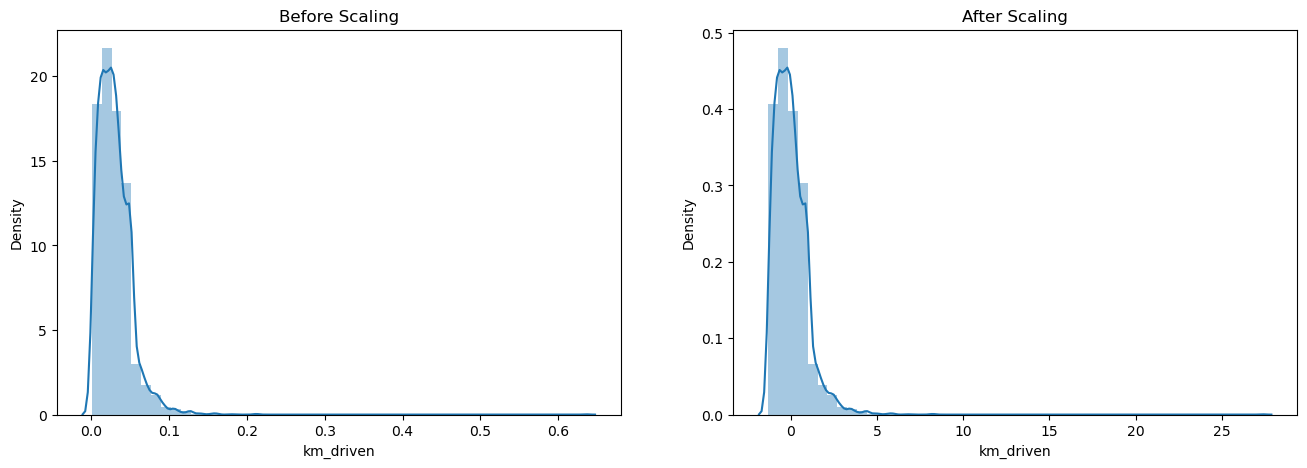

In [155]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['km_driven'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['km_driven'])
plt.title('After Scaling')

plt.show()

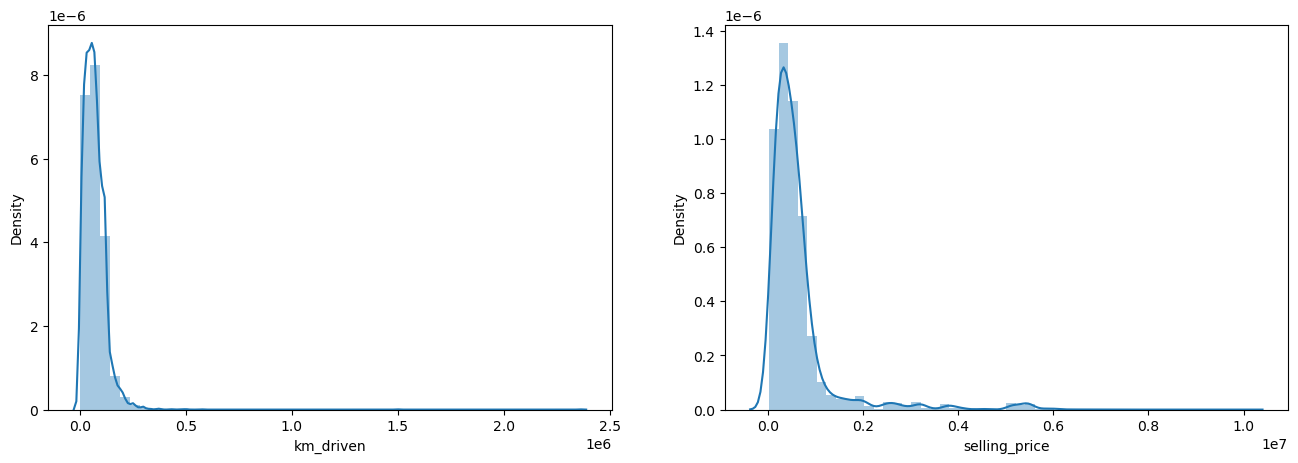

In [164]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['km_driven'])

plt.subplot(1,2,2)
sns.distplot(df['selling_price'])

plt.show()

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.7477458719799095

<Axes: >

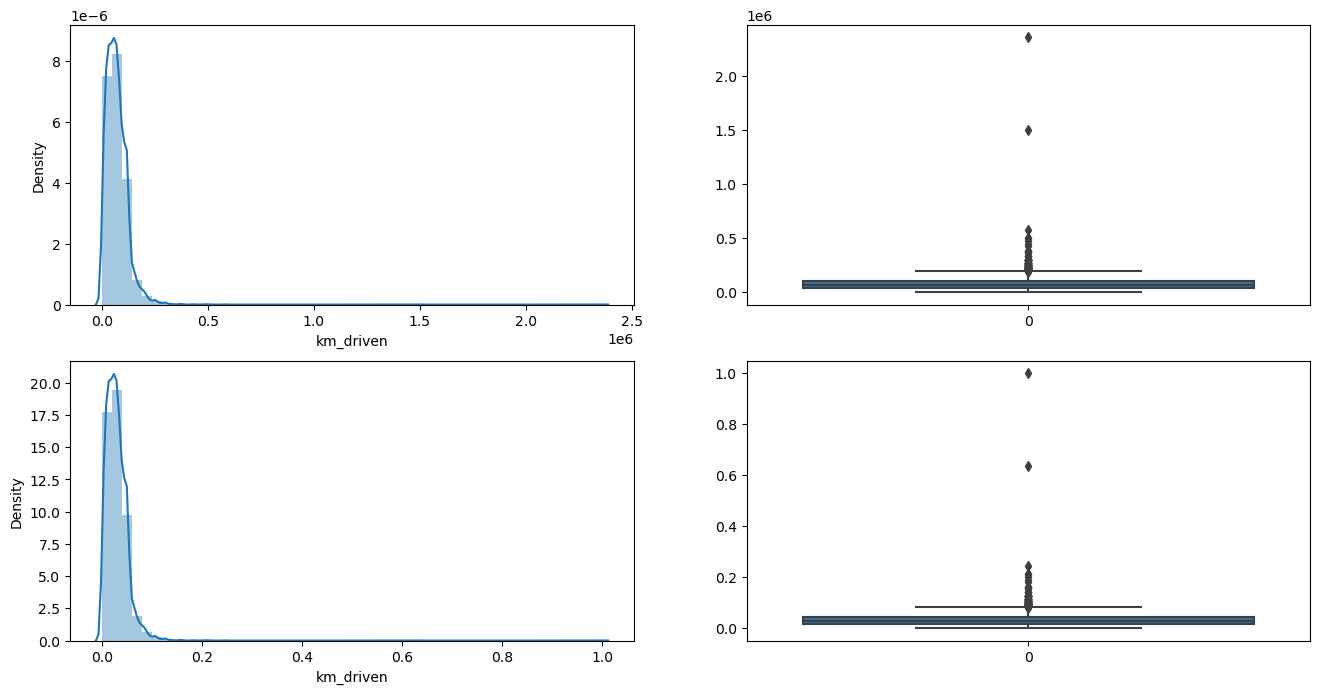

In [169]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dfn['km_driven'])

plt.subplot(2,2,2)
sns.boxplot(dfn['km_driven'])

plt.subplot(2,2,3)
sns.distplot(dummies1['km_driven'])

plt.subplot(2,2,4)
sns.boxplot(dummies1['km_driven'])

In [ ]:
#BOX_COX

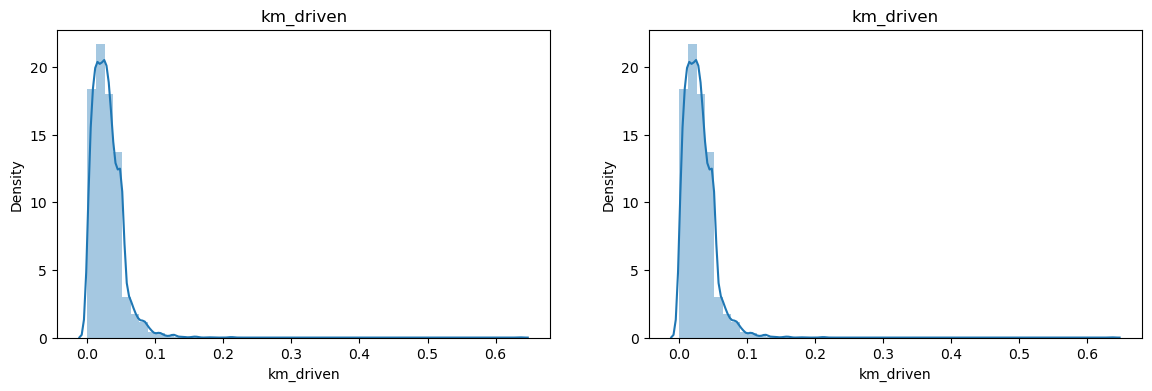

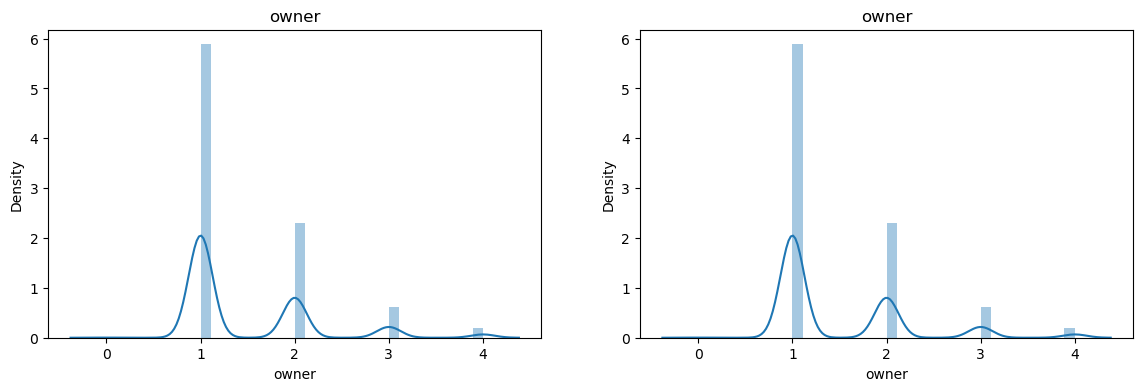

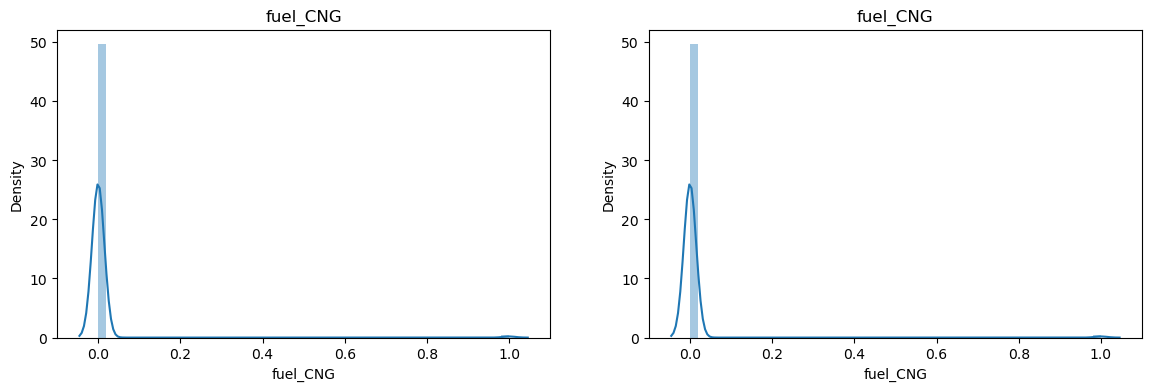

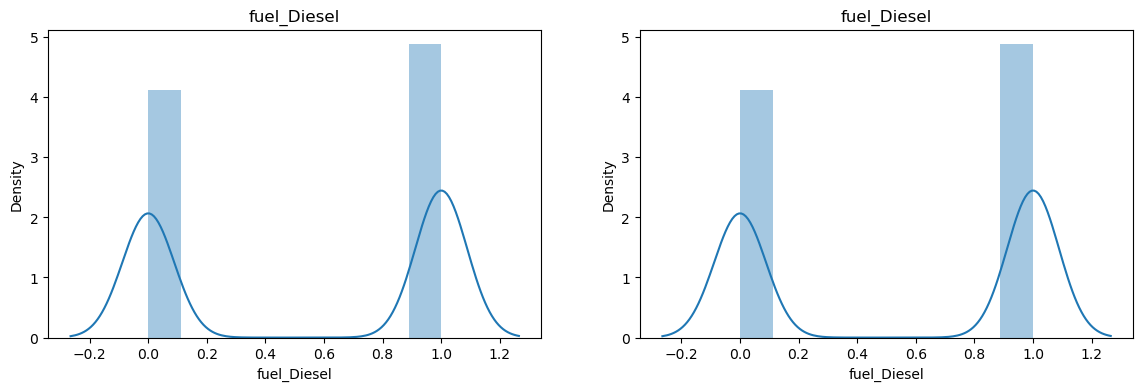

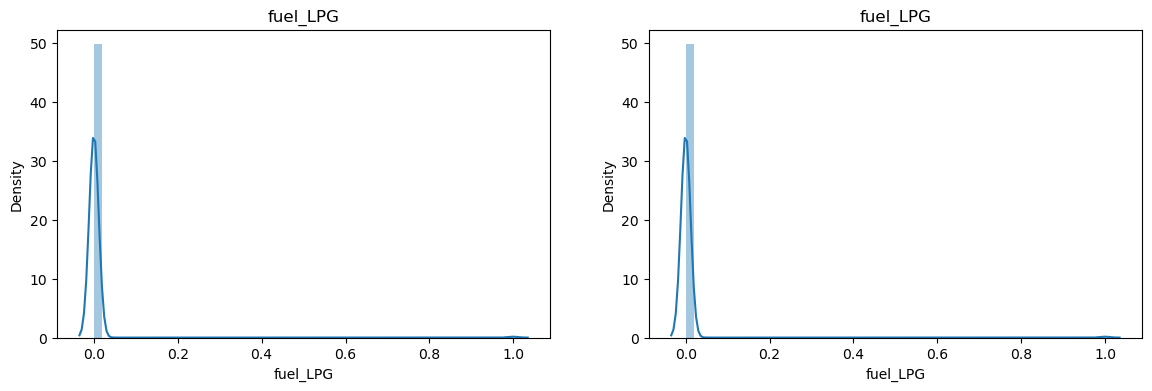

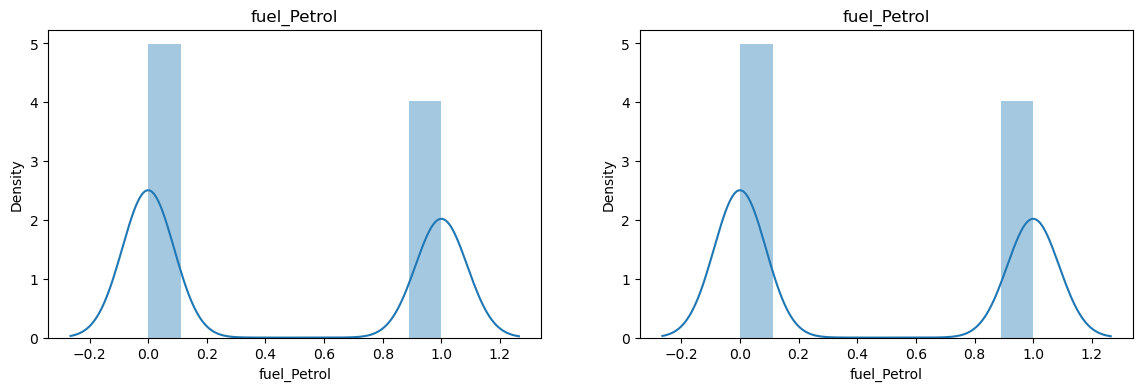

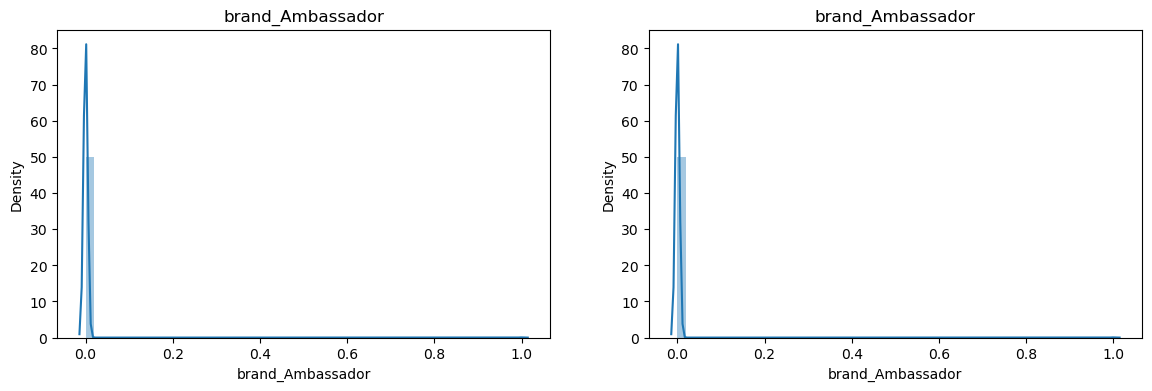

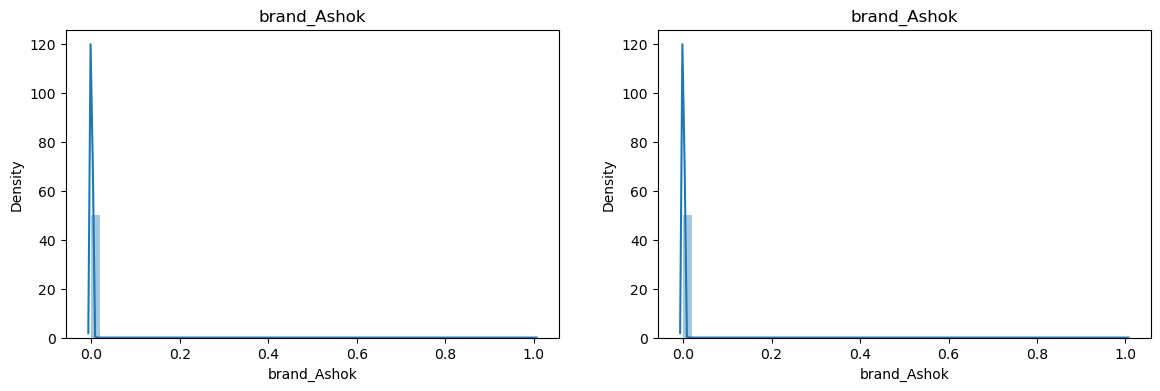

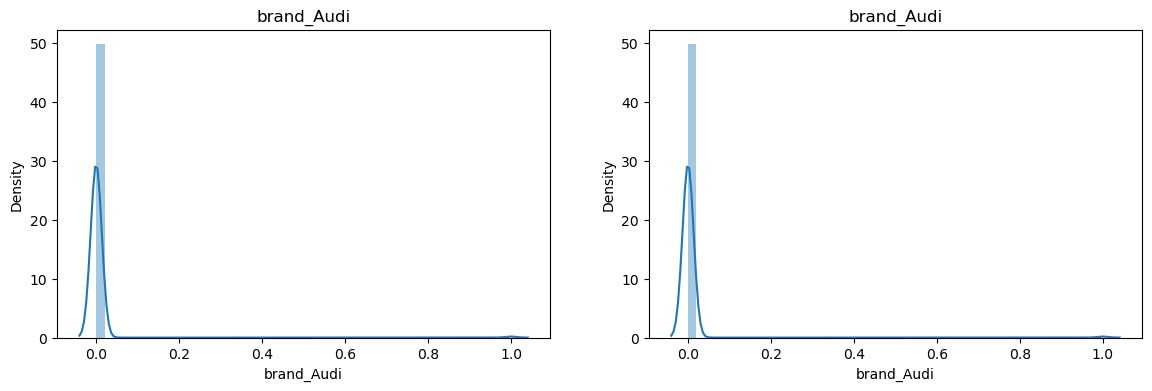

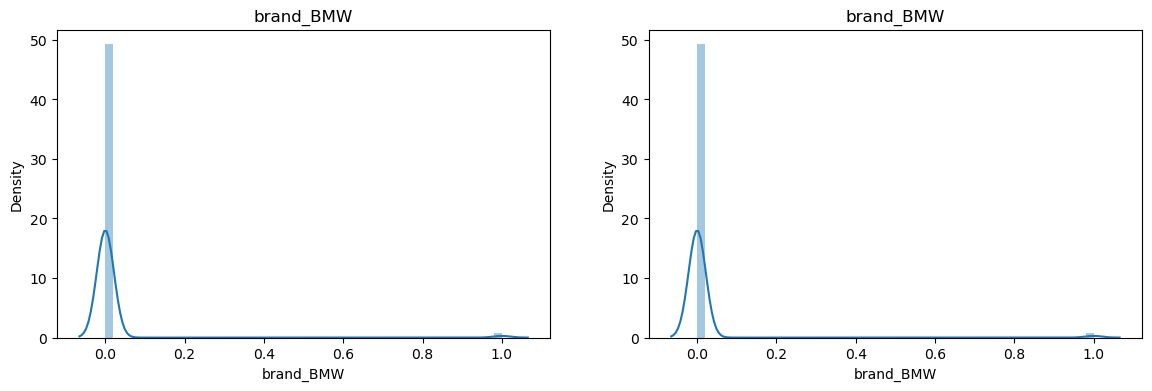

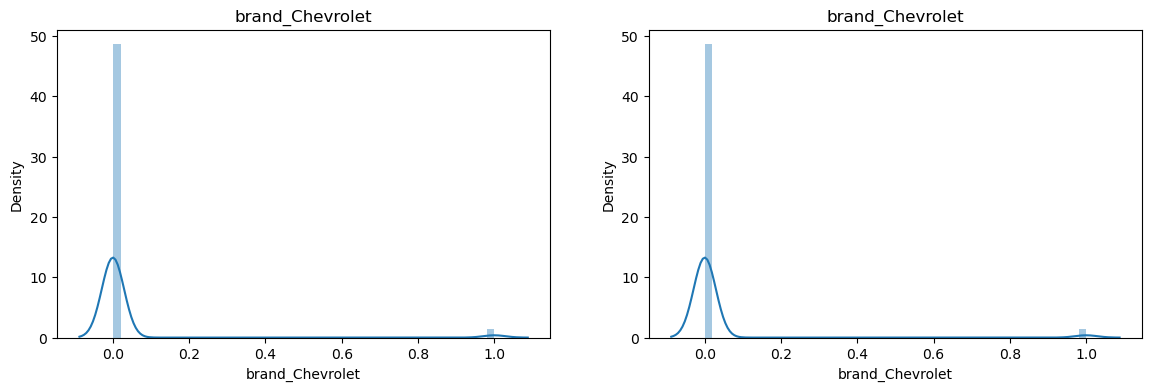

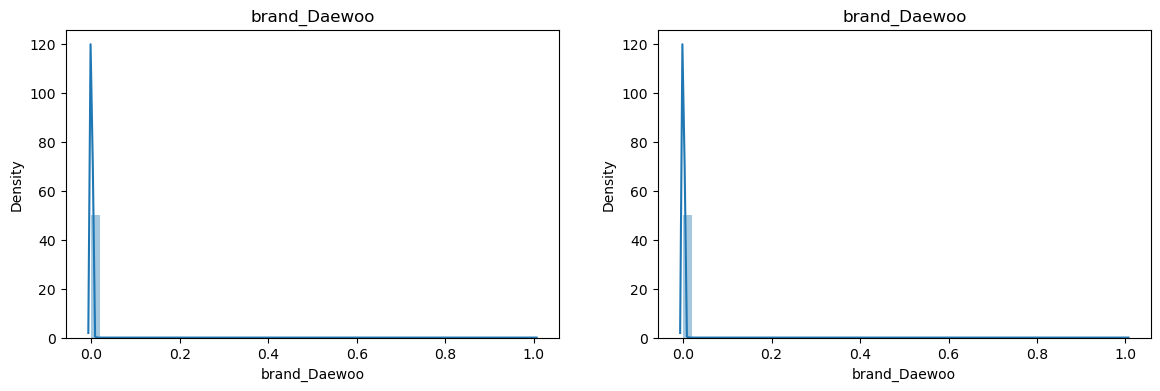

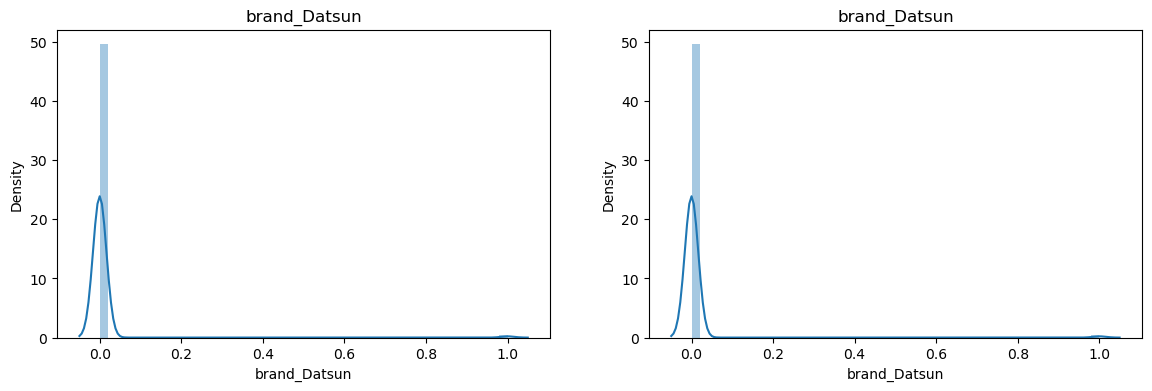

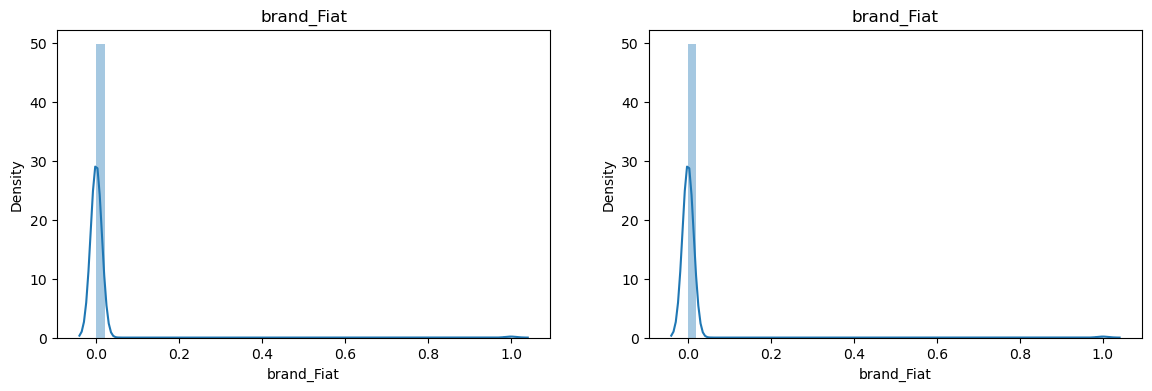

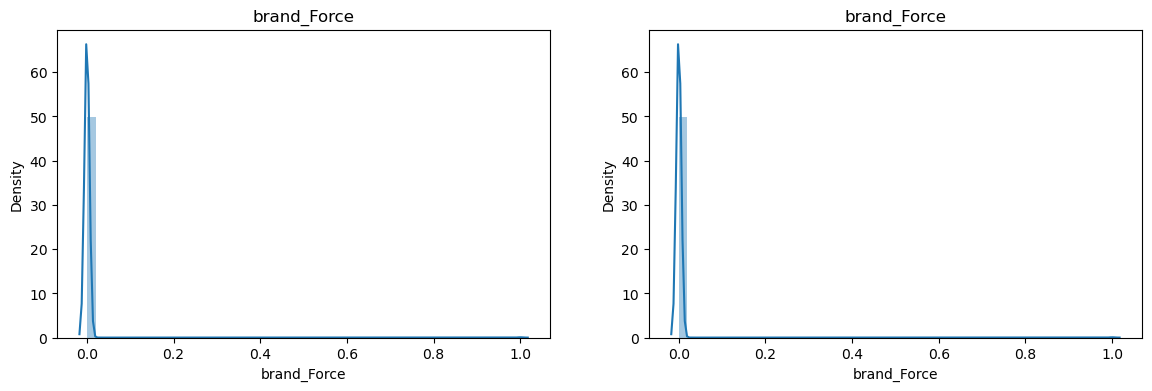

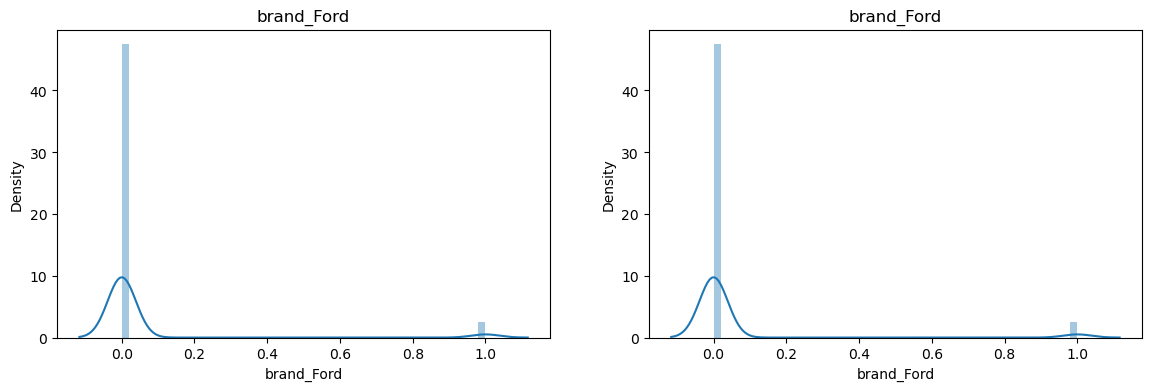

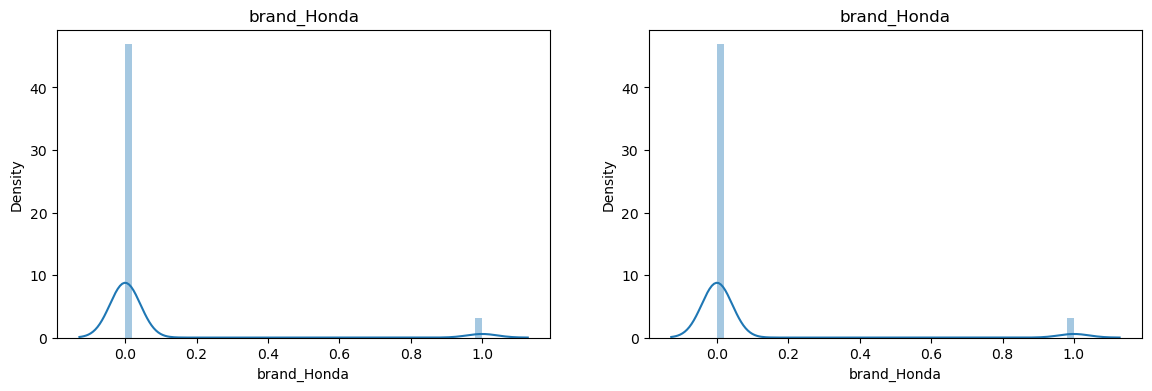

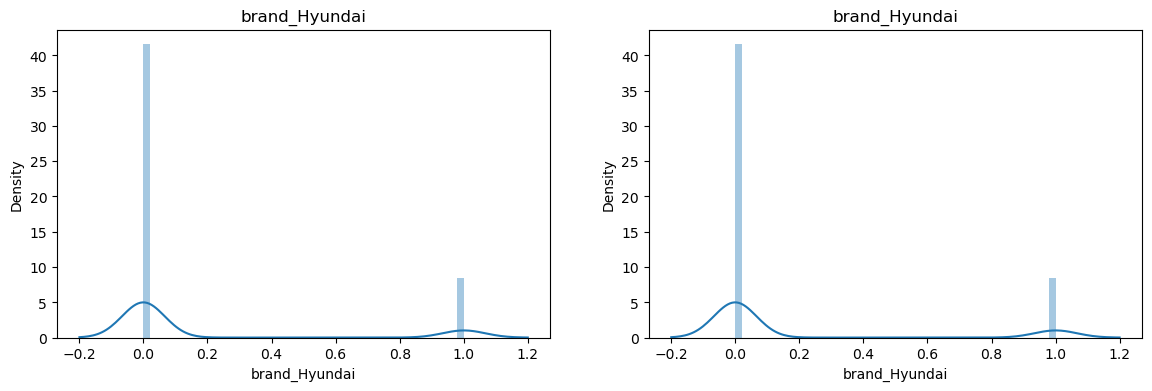

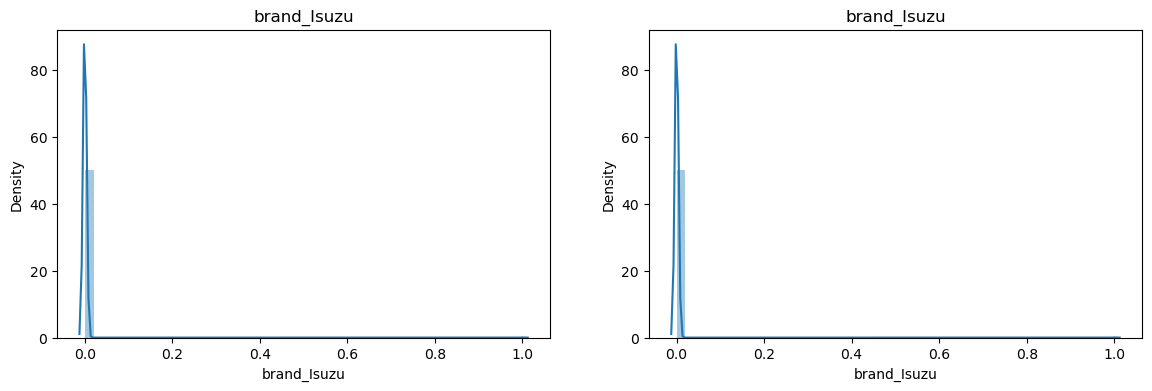

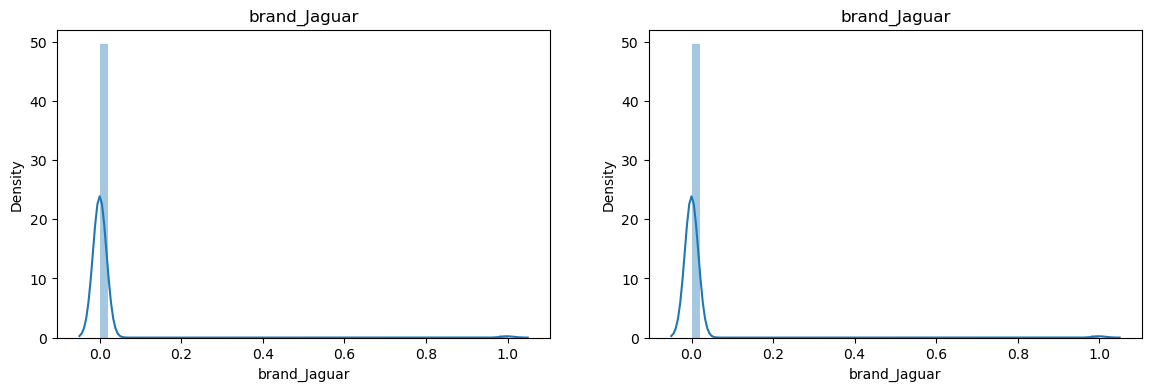

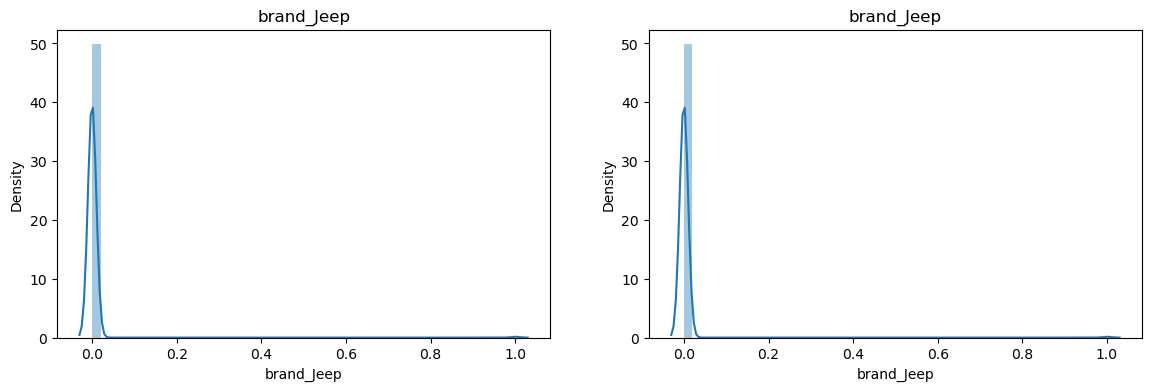

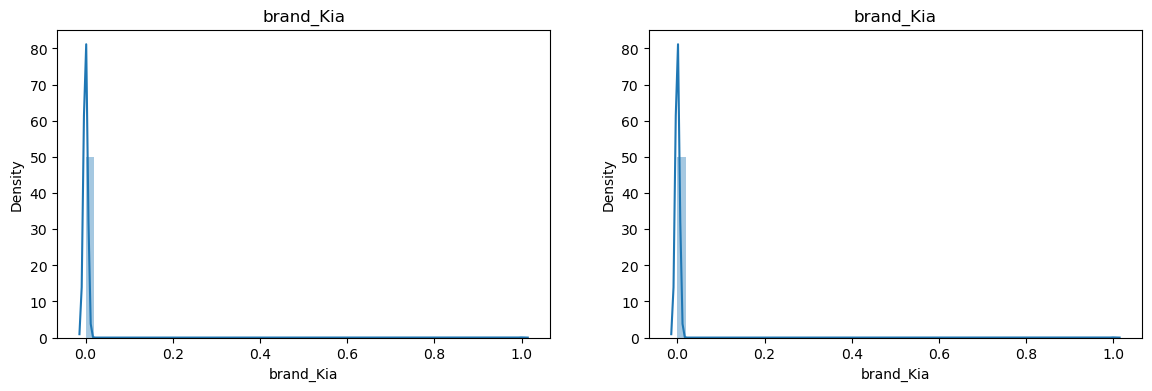

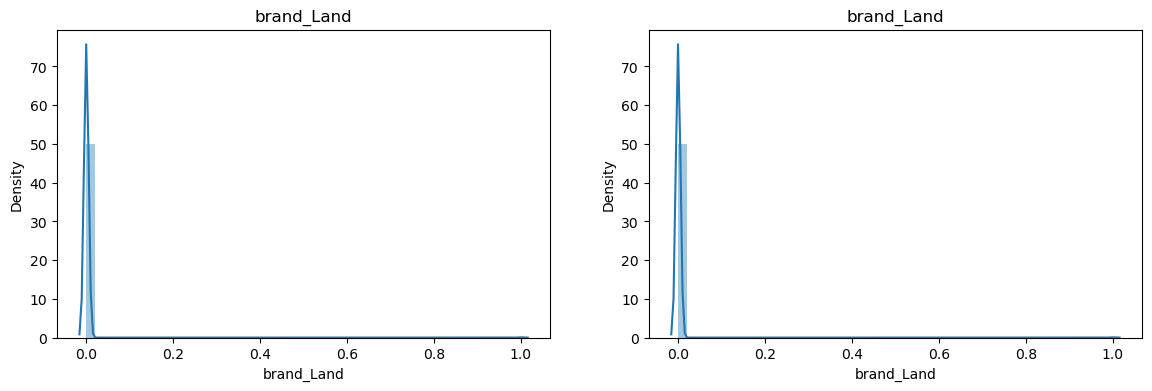

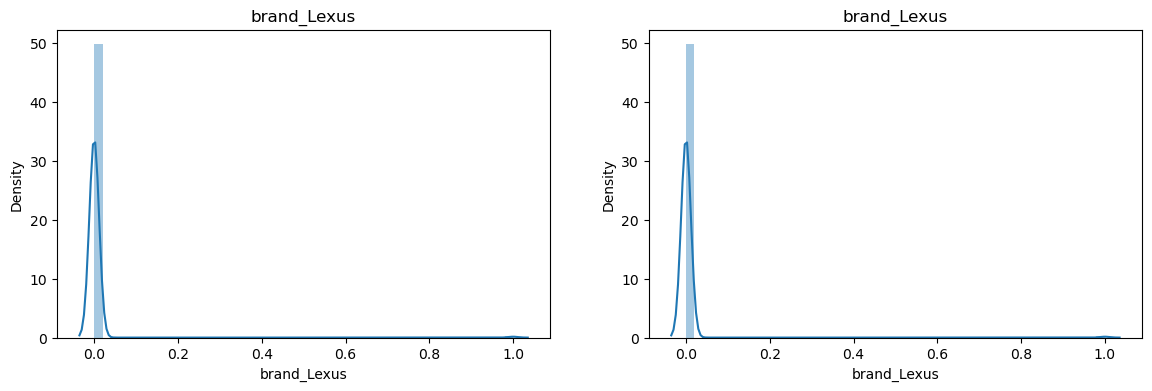

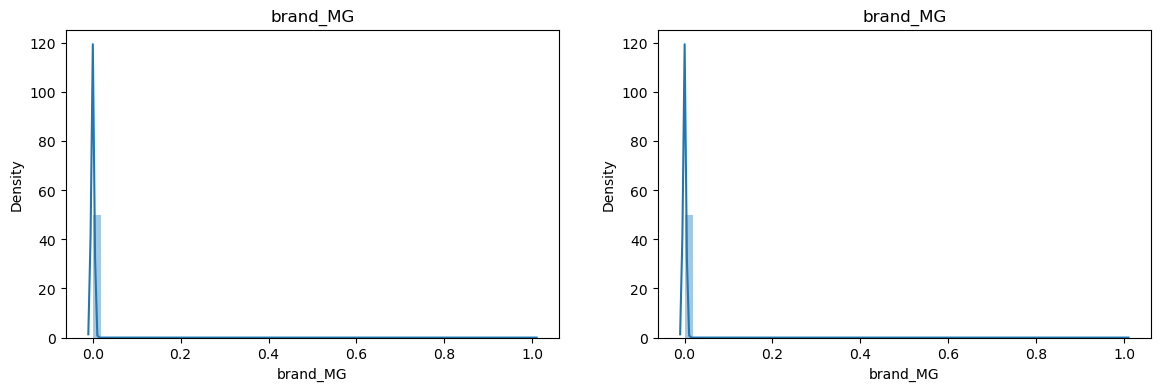

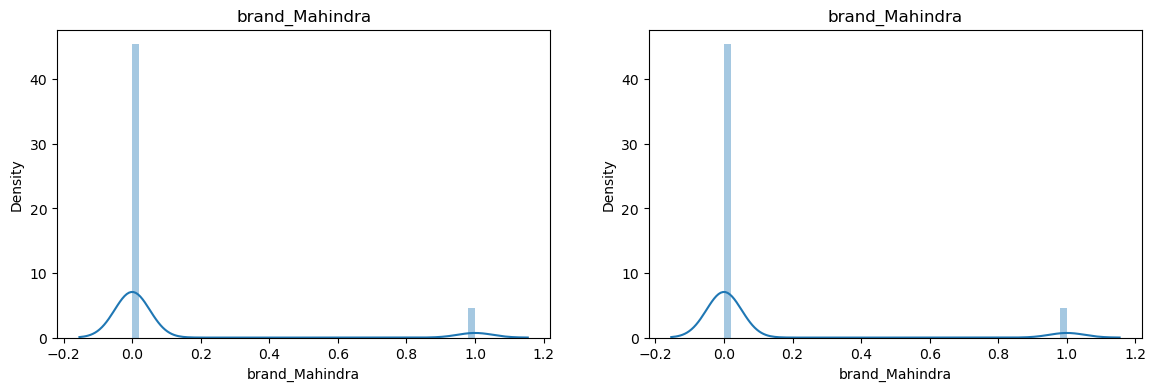

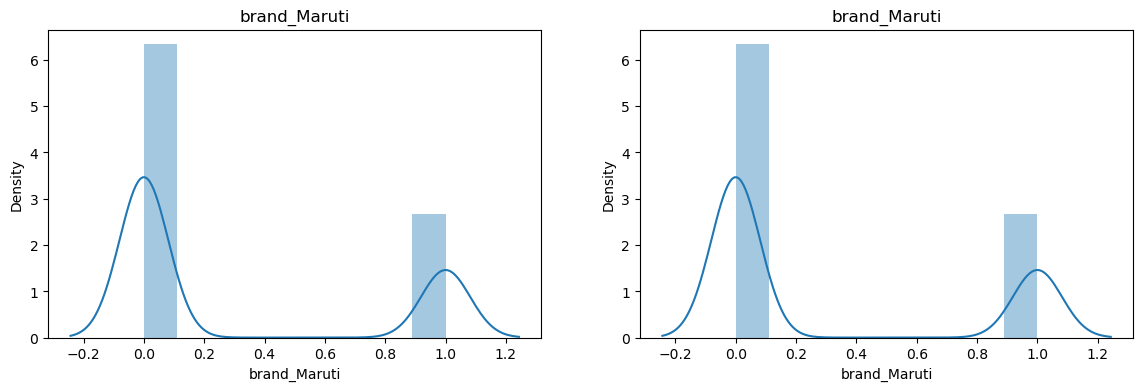

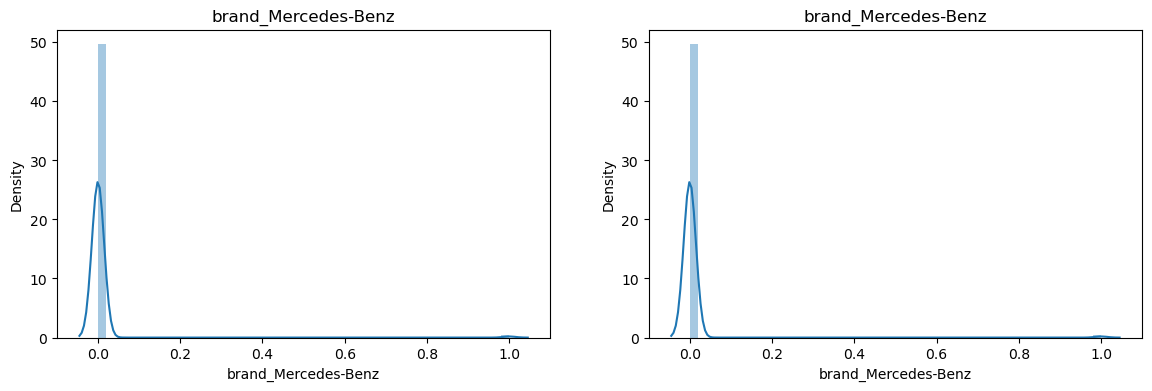

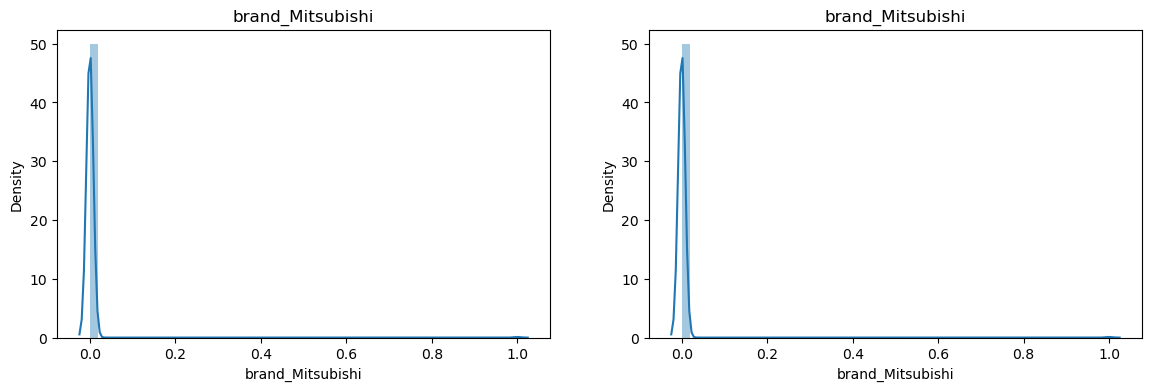

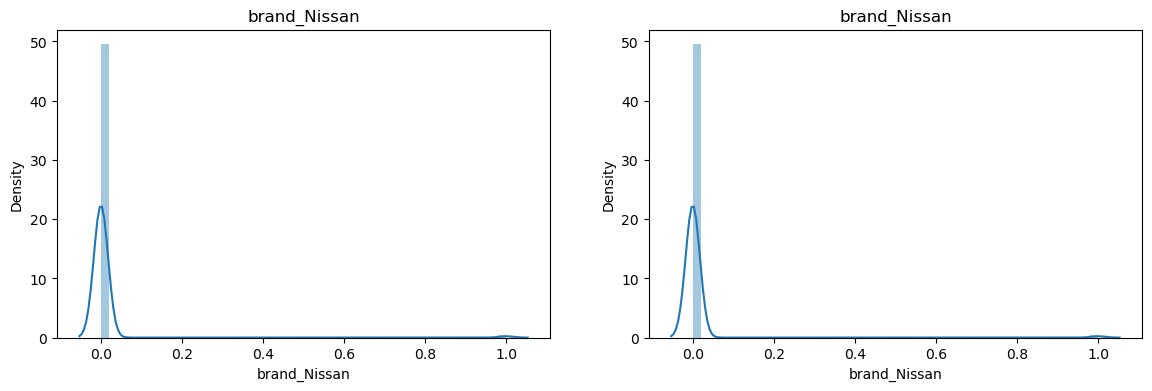

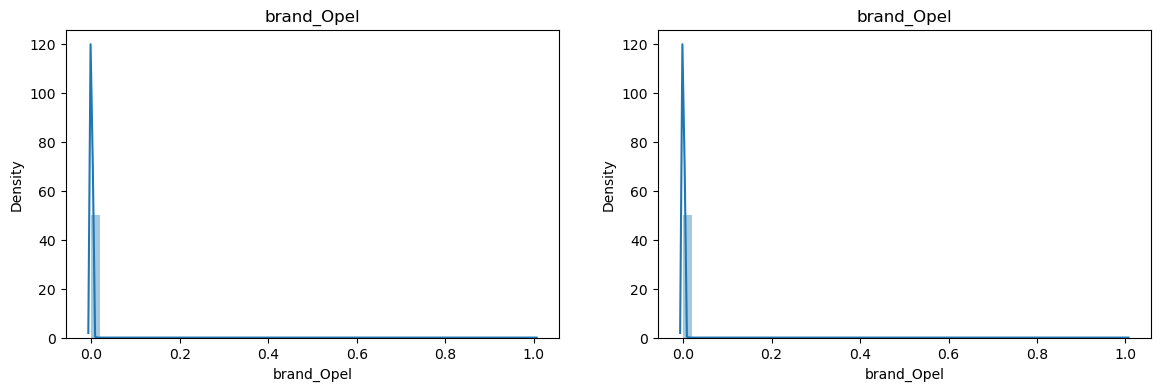

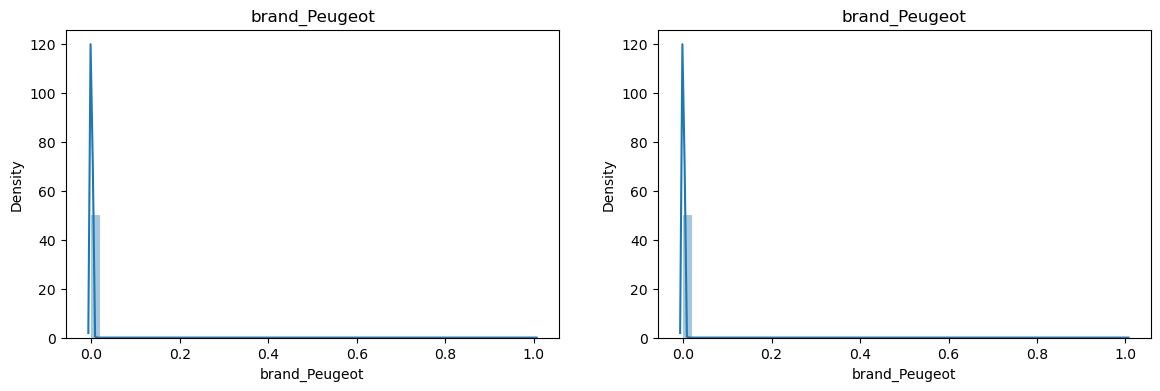

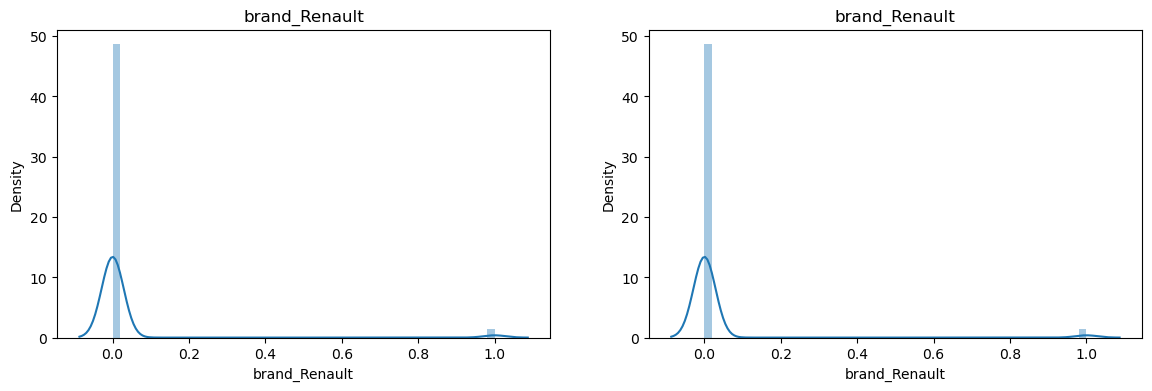

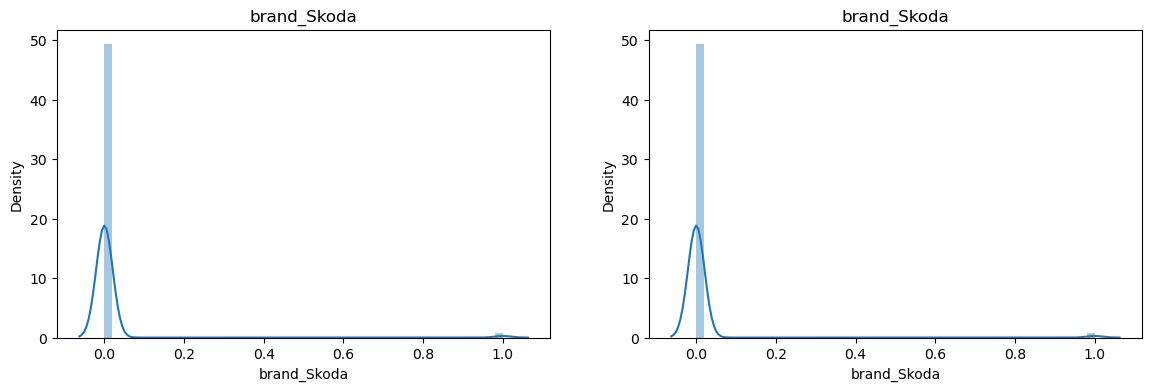

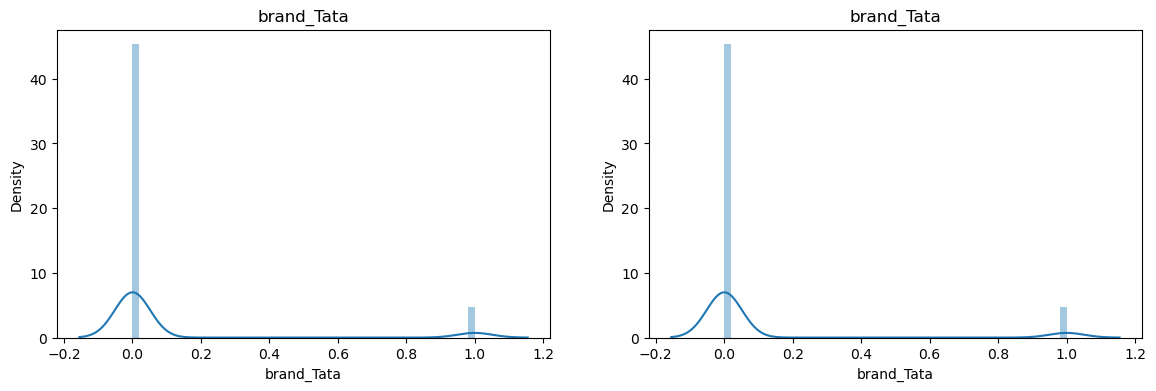

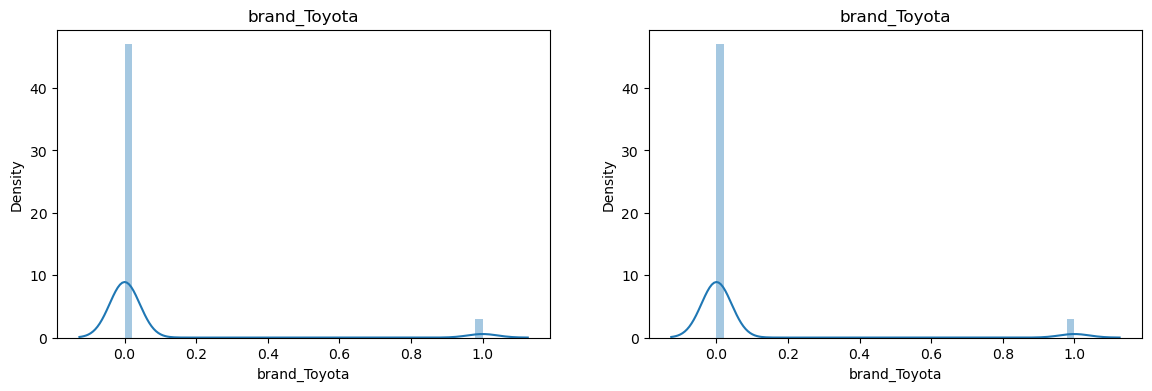

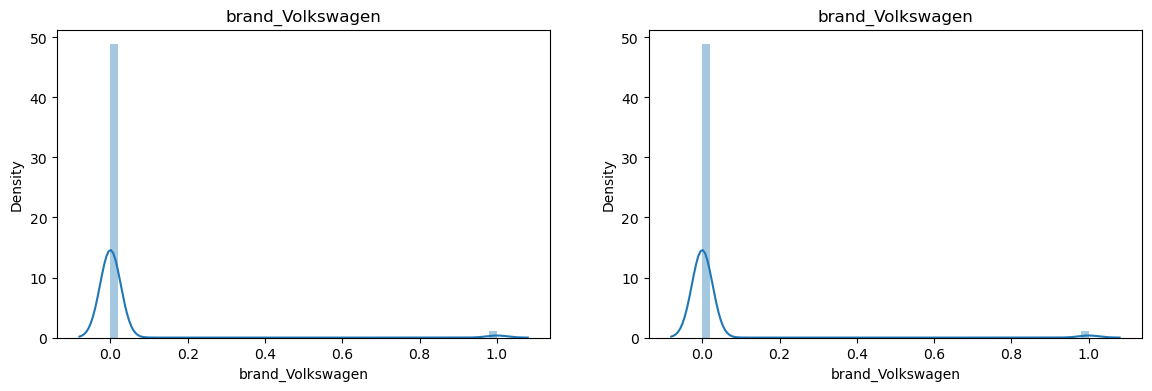

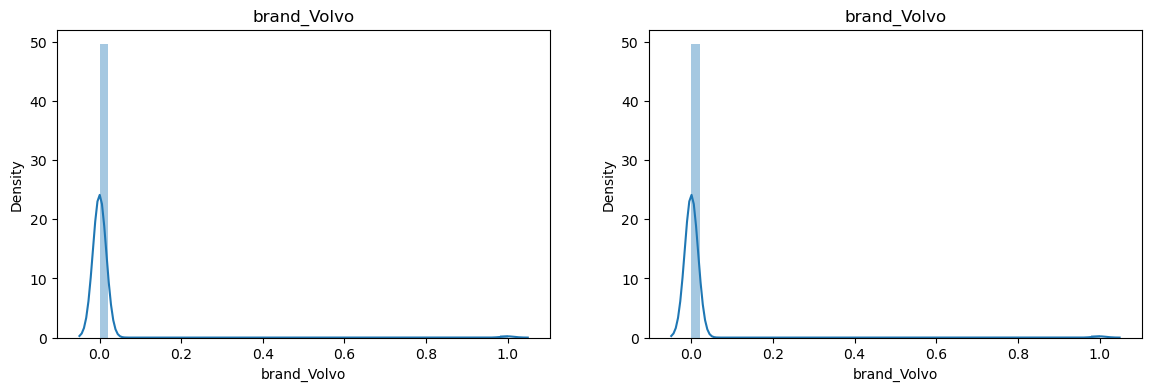

In [176]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.show()

